In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
from numpy import log, array, unique

In [36]:
# Read in the data
df = pd.read_pickle('df_persons_wsltur_with_entropy4.pkl')

In [37]:
df.shape

(2895, 99)

In [38]:
# Convert df to a geodataframe using the lat/lon columns
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LocationLongitude, df.LocationLatitude))


c:\Users\mwendwa.kiko\Anaconda3\envs\geopandasenv_kiko\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [9]:
gtha = gpd.read_file(r'C:\Users\mwendwa.kiko\Documents\Personal_Kiko\OneDrive\OneDrive - University of Toronto\UofT\Research\IATBR\OSM Analysis\GTHA_Boundary-shp\GTHA_Boundary.shp')
# Generate a bounding box for the GTHA
gtha_bbox = gtha.total_bounds
gtha_bbox

array([-80.248423,  43.050553, -78.437503,  44.516972])

In [10]:
# Open DMTI shapefile
# dmti = gpd.read_file(r'.\DMTI_2019_CMCS_LandCoverRegion\DMTI_2019_CMCS_LandCoverRegion.shp')

In [11]:
# dmti

,UID,NAME,CATEGORY,MUNICIPAL,PROV,ACCURACY,ACQ_TECH,SHAPE_Leng,SHAPE_Area,geometry
0,38C50E35-73FA-48CE-9A81-DFC8013455F6,LAND COVER,RESIDENTIAL,BURNABY,BC,-1,-1,0.006862,1.371761e-06,"POLYGON ((-122.91075 49.24483, -122.91062 49.2..."
1,6F9A4D67-2305-4EC8-A583-AC70417016C0,LAND COVER,RESIDENTIAL,GREATER VANCOUVER,BC,-1,-1,0.007228,1.538319e-06,"POLYGON ((-123.19366 49.24479, -123.19366 49.2..."
2,950373DD-418C-492B-9D68-C76549C3B51F,LAND COVER,RESIDENTIAL,NANAIMO,BC,-1,-1,0.018526,7.342337e-06,"POLYGON ((-124.04538 49.24366, -124.04539 49.2..."
3,EB52D511-AFC5-4962-8CC3-3CEDF78D362A,LAND COVER,RESIDENTIAL,VANCOUVER,BC,-1,-1,0.006002,1.614685e-06,"POLYGON ((-123.14020 49.24482, -123.14017 49.2..."
4,BD7369D1-0884-41C8-B437-AAB37C1D947D,LAND COVER,PARKS AND RECREATIONAL,VANCOUVER,BC,-1,-1,0.008243,2.070354e-07,"POLYGON ((-123.15228 49.24481, -123.15084 49.2..."
...,...,...,...,...,...,...,...,...,...,...
729418,F640DA9F-850A-46E6-9620-8C9204742595,LAND COVER,WATERBODY,LEAMINGTON,ON,-1,-1,0.059078,2.016324e-04,"POLYGON ((-82.56224 42.00005, -82.56159 41.999..."
729419,75373D45-FF3D-4A35-8F78-1C4BB02DECD7,LAND COVER,WATERBODY,KINGSVILLE,ON,-1,-1,0.241388,3.270039e-03,"POLYGON ((-82.74148 42.00000, -82.74966 41.977..."
729420,15D0E565-1AE4-43E4-A6DC-0C1D5C3BB2C9,LAND COVER,OPEN AREA,ESSEX,ON,-1,-1,0.043942,5.867684e-06,"POLYGON ((-82.95283 41.99440, -82.95295 41.994..."
729421,2AF485C6-979F-4090-9CB9-A80AD859C3A9,LAND COVER,WATERBODY,ESSEX,ON,-1,-1,0.157354,4.191322e-04,"POLYGON ((-82.96572 42.00003, -82.96532 41.999..."


In [12]:
# dmti.CATEGORY.unique()

array(['RESIDENTIAL', 'PARKS AND RECREATIONAL', 'OPEN AREA',
       'GOVERNMENT AND INSTITUTIONAL', 'WATERBODY', 'COMMERCIAL',
       'RESOURCE AND INDUSTRIAL'], dtype=object)

In [13]:
# Region within the GTHA
# dmti_gtha = dmti[dmti.geometry.within(gtha.unary_union)]
# dmti_gtha

,UID,NAME,CATEGORY,MUNICIPAL,PROV,ACCURACY,ACQ_TECH,SHAPE_Leng,SHAPE_Area,geometry
298800,0BCE0D73-4485-4FF3-B990-4A60163A9A62,LAND COVER,RESIDENTIAL,BROCK,ON,-1,-1,0.009302,2.905967e-06,"POLYGON ((-79.16358 44.43417, -79.16325 44.434..."
298878,8DCC8028-A946-460E-ADB6-BF036C71487F,LAND COVER,RESIDENTIAL,GEORGINA,ON,-1,-1,0.003451,6.208840e-07,"POLYGON ((-79.37419 44.32314, -79.37370 44.323..."
299115,84F361BE-09DD-4B5A-946F-2986877BB23D,LAND COVER,OPEN AREA,BROCK,ON,-1,-1,0.042670,1.011424e-05,"POLYGON ((-79.14375 44.37790, -79.14833 44.373..."
299524,01A2DCBC-8103-4386-BAF1-80E0C5351D1A,LAND COVER,PARKS AND RECREATIONAL,BROCK,ON,-1,-1,0.000192,1.524509e-09,"POLYGON ((-79.04567 44.33528, -79.04575 44.335..."
299825,B25373DC-5028-41FE-9C6F-4667C8E7D704,LAND COVER,OPEN AREA,BROCK,ON,-1,-1,0.059479,1.432691e-04,"POLYGON ((-79.18069 44.31883, -79.18006 44.319..."
...,...,...,...,...,...,...,...,...,...,...
701054,1E0DC16D-0561-434E-9D9F-AEEF73EBC3CB,LAND COVER,OPEN AREA,HAMILTON,ON,-1,-1,0.000336,2.563184e-09,"POLYGON ((-79.74725 43.06670, -79.74709 43.066..."
701280,B6959C84-8EAF-4FED-BCFA-EF3BB7FD348E,LAND COVER,OPEN AREA,HAMILTON,ON,-1,-1,0.079759,2.773207e-04,"POLYGON ((-79.78309 43.07277, -79.78303 43.072..."
701288,52E5EABC-503B-4535-8AE7-27C4311763E6,LAND COVER,OPEN AREA,HAMILTON,ON,-1,-1,0.008319,2.161047e-06,"POLYGON ((-79.79809 43.06597, -79.79432 43.066..."
701760,0756E763-BA72-440C-95FF-EA7303C65E26,LAND COVER,WATERBODY,HAMILTON,ON,-1,-1,0.008537,1.090870e-06,"POLYGON ((-79.78133 43.06414, -79.78137 43.063..."


In [14]:
# Save to shapefile
# dmti_gtha.to_file(r'.\DMTI_2019_CMCS_LandCoverRegion\DMTI_2019_CMCS_LandCoverRegion_GTHA.shp')

c:\Users\mwendwa.kiko\Anaconda3\envs\geopandasenv_kiko\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [ ]:
# Read in the shapefile for the GTHA
dmti_gtha = gpd.read_file(r'.\DMTI_2019_CMCS_LandCoverRegion\DMTI_2019_CMCS_LandCoverRegion_GTHA.shp')

## Entropy analysis

The input parameters. See page 7 of the documentation for more details.

In [23]:
lu = dmti_gtha.copy()
grid = gpd.read_file(r"squares_gtha_1km.shp")
uid_lc = "CATEGORY"
uid_grid="FID"
temp_path=r".\temp_land_use_calc"

In [24]:
grid

,FID,geometry
0,0,"POLYGON ((-79.78931 43.06536, -79.78931 43.080..."
1,1,"POLYGON ((-79.77450 43.06536, -79.77450 43.080..."
2,2,"POLYGON ((-79.83374 43.08017, -79.83374 43.094..."
3,3,"POLYGON ((-79.81893 43.08017, -79.81893 43.094..."
4,4,"POLYGON ((-79.80412 43.08017, -79.80412 43.094..."
...,...,...
4139,4139,"POLYGON ((-79.09324 44.47232, -79.09324 44.487..."
4140,4140,"POLYGON ((-79.13767 44.48713, -79.13767 44.501..."
4141,4141,"POLYGON ((-79.12286 44.48713, -79.12286 44.501..."
4142,4142,"POLYGON ((-79.10805 44.48713, -79.10805 44.501..."


In [25]:
grid.to_crs(epsg=3348, inplace=True)
lu.to_crs(epsg=3348, inplace=True)

## Define the class for the land use mix indices

The main part of the application. The "lum" class contains two functions for the calculation of a land use mix index: One for the entropy index and one for the HHI. It also uses an intermediate function that does some standard geoprocessing operations that are useful for both other functions. See the documentation for more details.

In [26]:
class lum:
    def __init__(self,lu,grid,uid_lc,uid_grid,temp_path):
        self.lu = lu
        self.grid = grid
        self.uid_lc = uid_lc
        self.uid_grid = uid_grid
        self.temp_path = temp_path
    
    def intermediate(self):
        intersection = gpd.overlay(self.lu,self.grid,how = 'intersection')
        dissolved = intersection.dissolve(by = [self.uid_lc,self.uid_grid])
    
        dissolved['poly_area'] = dissolved.area
        dissolved.to_file(os.path.join(self.temp_path,"dissolved.shp"))
    
        dissolved_new = gpd.read_file(os.path.join(self.temp_path,"dissolved.shp"))
        area_sum = dissolved_new[[self.uid_grid, "poly_area"]].groupby(self.uid_grid).sum()
    
        dissolved_new = dissolved_new.merge(area_sum, on = self.uid_grid)
        dissolved_new.rename(columns = {'poly_area_y':'total_area_cell'}, inplace = True) 
    
        ratios = (dissolved_new["poly_area_x"]/dissolved_new["total_area_cell"])
        
        num_classes_per_grid_feature = dissolved_new[[self.uid_grid, uid_lc]].groupby(self.uid_grid).count()
        
        return dissolved_new,ratios,num_classes_per_grid_feature,intersection
    
    def entropy(self):
        dataset = self.intermediate()[0]
        ratios_c = self.intermediate()[1]
        nuclapegrif=self.intermediate()[2]
        
        log_ratios = log(ratios_c)
        dataset['area_perc_log'] = log_ratios*ratios_c
        
        ln_num_classes_per_grid_feature = log(nuclapegrif)
        
        sum_logs = dataset[[self.uid_grid, "area_perc_log"]].groupby(self.uid_grid).sum()
        
        sum_logs_merged_ln_num_classes = sum_logs.merge(ln_num_classes_per_grid_feature,on = self.uid_grid)
        
        sum_logs_merged_ln_num_classes['ENTROPY'] = -1*(sum_logs_merged_ln_num_classes['area_perc_log']/sum_logs_merged_ln_num_classes[self.uid_lc])
        
        grid_final_entropy = (self.grid).merge(sum_logs_merged_ln_num_classes,on = self.uid_grid)
        
        return grid_final_entropy
    
    def hhi(self):
        dataset = self.intermediate()[0]
        ratios_c = self.intermediate()[1]
        hhi = ((ratios_c))*2
        
        dataset['HHI'] = hhi
        
        sum_squared_ratios = dataset[[self.uid_grid, "HHI"]].groupby(self.uid_grid).sum()
        grid_final_hhi = (self.grid).merge(sum_squared_ratios,on = self.uid_grid)
        
        return grid_final_hhi

## Applying some examples

We create an instance of the lum class and then we use the two functions for the calculations of land use mix. For both cases, we export the result into a shapefile. We can also do a basic plot of the result.

In [27]:
l=lum(lu,grid,uid_lc,uid_grid,temp_path)

In [28]:
shape_hhi=l.hhi()

shape_hhi.to_file('SF_land_use_hhi_dmti.shp')

c:\Users\mwendwa.kiko\Anaconda3\envs\geopandasenv_kiko\lib\site-packages\geopandas\geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
c:\Users\mwendwa.kiko\Anaconda3\envs\geopandasenv_kiko\lib\site-packages\geopandas\geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
c:\Users\mwendwa.kiko\Anaconda3\envs\geopandasenv_kiko\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


c:\Users\mwendwa.kiko\Anaconda3\envs\geopandasenv_kiko\lib\site-packages\geopandas\geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
c:\Users\mwendwa.kiko\Anaconda3\envs\geopandasenv_kiko\lib\site-packages\geopandas\geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
c:\Users\mwendwa.kiko\Anaconda3\envs\geopandasenv_kiko\lib\site-packages\geopandas\geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
c:\Users\mwendwa.kiko\Anaconda3\envs\geopandasenv_kiko\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,

<AxesSubplot:>

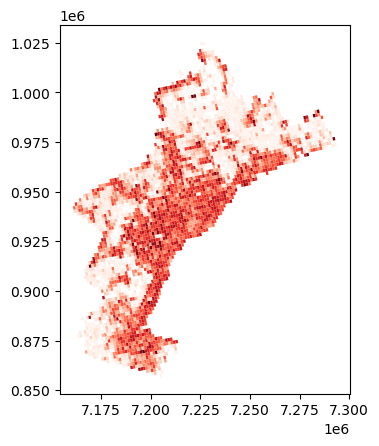

In [31]:
shape_entropy=l.entropy()

shape_entropy.to_file('SF_land_use_entropy_dmti.shp')

shape_entropy.plot(column="ENTROPY",cmap='Reds')

In [32]:
shape_entropy

,FID,geometry,area_perc_log,CATEGORY,ENTROPY
0,0,"POLYGON ((7204530.003 856476.081, 7204211.012 ...",-0.017128,0.693147,0.024710
1,1,"POLYGON ((7205746.956 856710.117, 7205427.578 ...",0.000000,0.000000,NaN
2,2,"POLYGON ((7200560.985 857435.646, 7200243.176 ...",-0.017295,0.693147,0.024951
3,3,"POLYGON ((7201777.715 857668.758, 7201459.520 ...",-0.246758,1.098612,0.224609
4,4,"POLYGON ((7202994.390 857902.154, 7202675.809 ...",0.000000,0.000000,NaN
...,...,...,...,...,...
4019,4136,"POLYGON ((7226214.317 1023862.732, 7225880.626...",-0.013599,0.693147,0.019620
4020,4137,"POLYGON ((7227392.295 1024101.813, 7227058.222...",0.000000,0.000000,NaN
4021,4138,"POLYGON ((7228570.218 1024341.168, 7228235.761...",0.000000,0.000000,NaN
4022,4140,"POLYGON ((7225880.626 1025507.848, 7225546.959...",0.000000,0.000000,NaN


In [34]:
shape_entropy.ENTROPY.isna().sum()

462

In [35]:
shape_entropy.ENTROPY.notna().sum()

3562

# After running entropy calculation

In [49]:
# Fill in the missing values with the median entropy value
shape_entropy_backup = shape_entropy.copy()
shape_entropy['ENTROPY'] = shape_entropy['ENTROPY'].fillna(shape_entropy['ENTROPY'].median())

In [63]:
shape_entropy = shape_entropy_backup.copy()
shape_entropy.dropna(subset=['ENTROPY'], inplace=True)

In [57]:
shape_entropy.crs

<Projected CRS: EPSG:3348>
Name: NAD83(CSRS) / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada
- bounds: (-141.01, 40.04, -47.74, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [40]:
# shape_entropy.to_crs(epsg=3348, inplace=True)

In [66]:
shape_entropy['Centroids'] = shape_entropy.centroid
shape_entropy

,FID,geometry,area_perc_log,CATEGORY,ENTROPY,Centroids
0,0,"POLYGON ((7204530.003 856476.081, 7204211.012 ...",-0.017128,0.693147,0.024710,POINT (7204978.896 857422.912)
2,2,"POLYGON ((7200560.985 857435.646, 7200243.176 ...",-0.017295,0.693147,0.024951,POINT (7201010.358 858382.065)
3,3,"POLYGON ((7201777.715 857668.758, 7201459.520 ...",-0.246758,1.098612,0.224609,POINT (7202226.867 858615.282)
6,6,"POLYGON ((7205427.578 858369.794, 7205108.224 ...",-0.010813,0.693147,0.015600,POINT (7205876.069 859316.631)
9,9,"POLYGON ((7197810.327 858630.271, 7197493.315 ...",-0.292333,1.098612,0.266093,POINT (7198259.959 859576.382)
...,...,...,...,...,...,...
4001,4106,"POLYGON ((7230752.744 1019645.463, 7230417.834...",-0.065028,0.693147,0.093815,POINT (7231174.682 1020588.081)
4005,4122,"POLYGON ((7224524.112 1020094.509, 7224191.141...",-0.441812,0.693147,0.637400,POINT (7224946.968 1021036.538)
4006,4123,"POLYGON ((7225702.968 1020333.196, 7225369.614...",-0.066816,0.693147,0.096396,POINT (7226125.604 1021275.324)
4018,4135,"POLYGON ((7225036.283 1023623.926, 7224702.976...",-0.011985,0.693147,0.017290,POINT (7225458.560 1024565.862)


In [45]:
gdf.crs = {'init' :'epsg:4326'}
# shape_entropy.to_crs(3348, inplace=True)

c:\Users\mwendwa.kiko\Anaconda3\envs\geopandasenv_kiko\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [69]:
gdf.to_crs(epsg=3348, inplace=True)


In [64]:
shape_entropy['ENTROPY'].describe()

count    3562.000000
mean        0.342127
std         0.273607
min         0.000041
25%         0.064984
50%         0.321773
75%         0.577764
max         0.999987
Name: ENTROPY, dtype: float64

<AxesSubplot:>

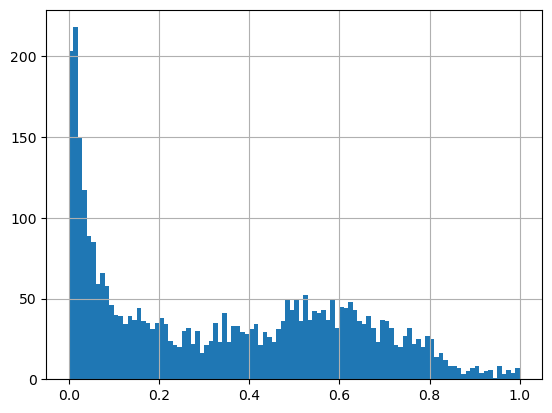

In [65]:
shape_entropy['ENTROPY'].hist(bins=100)

In [71]:
def calculate_nearest_centroid(row):
    nearest_centroid = shape_entropy['Centroids'].distance(row.geometry).idxmin()
    return shape_entropy.loc[nearest_centroid, 'ENTROPY']

df['entropy'] = gdf.apply(calculate_nearest_centroid, axis=1)
df['entropy']

0       0.487002
1       0.518861
2       0.798921
3       0.640135
4       0.487002
          ...   
2890    0.495581
2891    0.603942
2892    0.558124
2893    0.506838
2894    0.518861
Name: entropy, Length: 2895, dtype: float64

In [72]:
df['entropy'].describe()

count    2895.000000
mean        0.545689
std         0.164404
min         0.005111
25%         0.466022
50%         0.554727
75%         0.670786
max         0.999987
Name: entropy, dtype: float64

In [73]:
df['entropy'].isna().sum()

0

In [74]:
df.to_pickle('df_persons_wsltur_with_entropy5.pkl')